# P5: Convolutioneel Neuraal Netwerk

# Data Augmentation

In [25]:
import tensorflow.keras.datasets.cifar10 as cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Hieronder wordt de data al genormaliseerd, anders gaat het plotten van de geaugmenteerde data mis.

In [26]:
# Normalize the data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

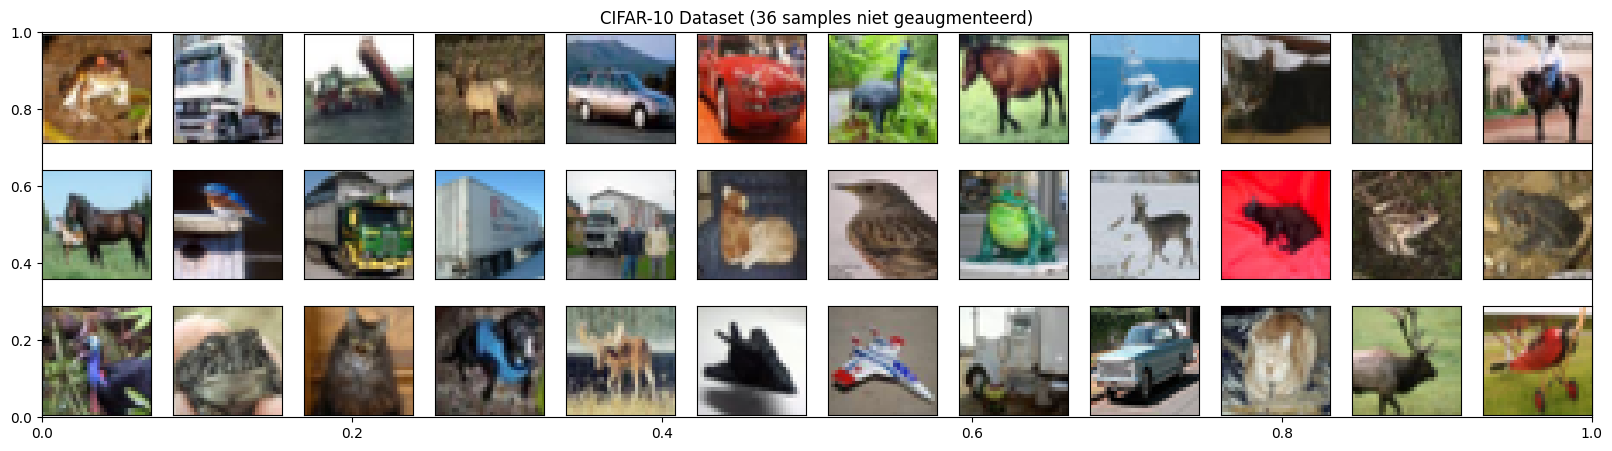

In [27]:
fig = plt.figure(figsize=(20, 5))
plt.title('CIFAR-10 Dataset (36 samples niet geaugmenteerd)')
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
plt.show()

Hieronder wordt een image processing generator aangemaakt en toegepast.

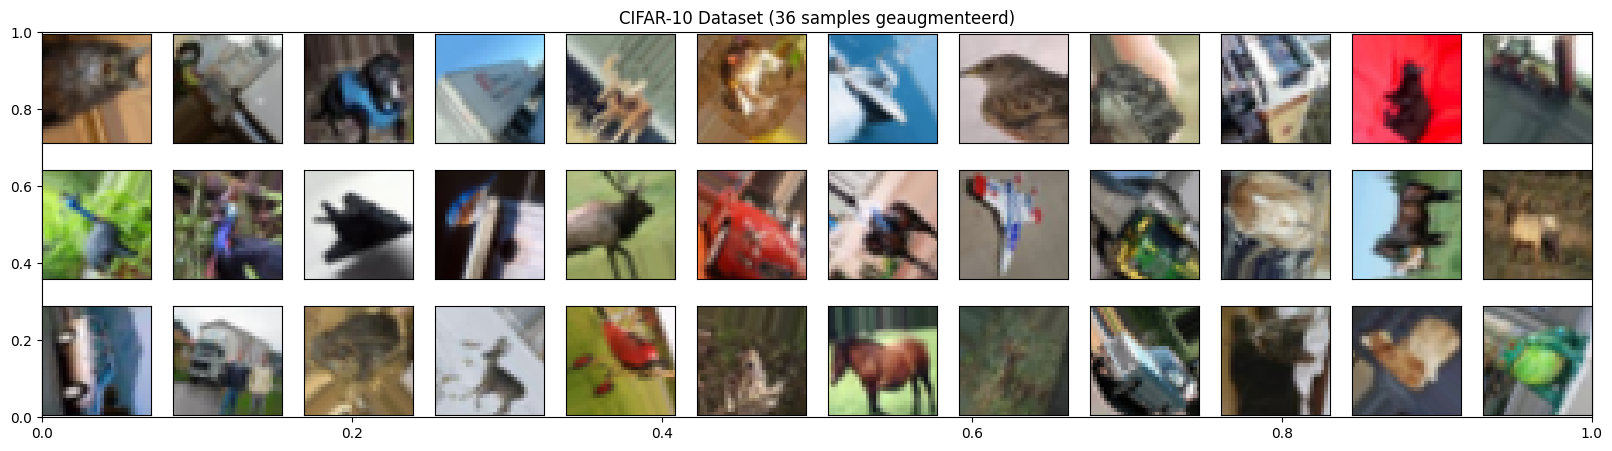

In [28]:
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
)

datagen.fit(x_train)

x_train_aug_example = datagen.flow(x_train[:36], y_train[:36], batch_size=36)


fig = plt.figure(figsize=(20, 5))
plt.title('CIFAR-10 Dataset (36 samples geaugmenteerd)')
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train_aug_example[0][0][i])


# Data preperation
De data is al genormaliseerd, nu nog dummies van targets maken.

In [29]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Modeling

In [30]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

train_generator = datagen.flow(x_train, y_train, batch_size=32)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(train_generator, steps_per_epoch=x_train.shape[0] // 32, epochs=30, verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 64)         

C:\Users\hvhee\AppData\Local\Temp\ipykernel_9780\2460310201.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=x_train.shape[0] // 32, epochs=30, verbose=1, validation_data=(x_test, y_test))


Epoch 1/30
1078/1562 [===================>..........] - ETA: 14s - loss: 1.8907 - accuracy: 0.3053

KeyboardInterrupt: 

https://devashree-madhugiri.medium.com/using-cnn-for-image-classification-on-cifar-10-dataset-7803d9f3b983